# Lab | Products review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re,string
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation

In [8]:
df = pd.read_csv("./datasets/kindle_reviews_sampled.csv.zip")

In [3]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,130918,B0063LXXOA,"[0, 0]",4,I liked this story going back to visist the fi...,"01 16, 2013",A66QR0ZQ8YET8,K. Floyd,Every Second Counts,1358294400
1,464192,B00BU67NY4,"[0, 0]",5,Not your typical love story. Popsicle was beyo...,"03 19, 2013",A9I2OPQT76SPD,LUV2READ,Raunchy!!,1363651200
2,420209,B00B8ZR41E,"[1, 1]",5,I loved these and so will you. They brought al...,"04 29, 2013",A3QGO0LC8C5VFV,misty morse,Absolutely loved these stories,1367193600
3,500564,B00CG6R4ZK,"[0, 0]",5,"Very nice cozy look at the next step for the ""...","10 27, 2013",A2QSRP25LFCQ7X,"Pam ""SMB,SLT""",Great tidbit,1382832000
4,796721,B00HY03FJM,"[0, 0]",5,Oh God I cried like a freaking baby. I have no...,"03 17, 2014",A35X4ALOWRAYB4,Legit,Oh my lawd,1395014400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78610 entries, 0 to 78609
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      78610 non-null  int64 
 1   asin            78610 non-null  object
 2   helpful         78610 non-null  object
 3   overall         78610 non-null  int64 
 4   reviewText      78609 non-null  object
 5   reviewTime      78610 non-null  object
 6   reviewerID      78610 non-null  object
 7   reviewerName    78338 non-null  object
 8   summary         78600 non-null  object
 9   unixReviewTime  78610 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 6.0+ MB


In [9]:
#Delete all features except overall, reviewText and summary
df = df.drop(['asin','helpful','reviewerID','reviewerName','unixReviewTime','reviewTime', 'Unnamed: 0'],axis=1)
df.head()

,overall,reviewText,summary
0,4,I liked this story going back to visist the fi...,Every Second Counts
1,5,Not your typical love story. Popsicle was beyo...,Raunchy!!
2,5,I loved these and so will you. They brought al...,Absolutely loved these stories
3,5,"Very nice cozy look at the next step for the ""...",Great tidbit
4,5,Oh God I cried like a freaking baby. I have no...,Oh my lawd


In [22]:
df.isna().sum()

overall        0
reviewText     0
summary       10
dtype: int64

In [23]:
df.head()

,overall,reviewText,summary
0,4,I liked this story going back to visist the fi...,Every Second Counts
1,5,Not your typical love story. Popsicle was beyo...,Raunchy!!
2,5,I loved these and so will you. They brought al...,Absolutely loved these stories
3,5,"Very nice cozy look at the next step for the ""...",Great tidbit
4,5,Oh God I cried like a freaking baby. I have no...,Oh my lawd


In [10]:
#combine the reviewText and the summary features into one feature called reviewText - Be sure to add a space (' ') to seperate the two
df['reviewText'] = df['reviewText'] + ' ' + df['summary']

In [24]:
df.isna().sum()

overall        0
reviewText     0
summary       10
dtype: int64

In [25]:
df['reviewText'].fillna("",inplace = True)

In [26]:
df.head()

,overall,reviewText,summary
0,4,I liked this story going back to visist the fi...,Every Second Counts
1,5,Not your typical love story. Popsicle was beyo...,Raunchy!!
2,5,I loved these and so will you. They brought al...,Absolutely loved these stories
3,5,"Very nice cozy look at the next step for the ""...",Great tidbit
4,5,Oh God I cried like a freaking baby. I have no...,Oh my lawd


In [27]:
df.overall.value_counts()

overall
5    45947
4    20385
3     7745
2     2661
1     1872
Name: count, dtype: int64

In [28]:
def review_sentiment(rating): #This function should return 1 or 0
    # Write a the code to replace rating of 1,2,3 with 0(not good) and 4,5 with 1(good) 
    if rating > 3:
        return 1
    else:
        return 0

In [29]:
#Transform the overal feature based on the review_sentiment above. Hint: Use the apply method on the Series 'overall'
df['overall'] = df['overall'].apply(review_sentiment)

In [30]:
df.head()

,overall,reviewText,summary
0,1,I liked this story going back to visist the fi...,Every Second Counts
1,1,Not your typical love story. Popsicle was beyo...,Raunchy!!
2,1,I loved these and so will you. They brought al...,Absolutely loved these stories
3,1,"Very nice cozy look at the next step for the ""...",Great tidbit
4,1,Oh God I cried like a freaking baby. I have no...,Oh my lawd


In [32]:
df.overall.value_counts()

overall
1    66332
0    12278
Name: count, dtype: int64

In [33]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [34]:
def clean_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = i.strip().lower()
            final_text.append(word)
    return " ".join(final_text) 

In [36]:
df['reviewText'] = df['reviewText'].apply(clean_text)
df.head()

,overall,reviewText,summary
0,1,liked story going back visist first couple. st...,Every Second Counts
1,1,typical love story. popsicle beyond vicious. p...,Raunchy!!
2,1,loved you. brought sorts feelings real life is...,Absolutely loved these stories
3,1,"nice cozy look next step ""celtic"" witch loves ...",Great tidbit
4,1,oh god cried like freaking baby. words much bo...,Oh my lawd


In [39]:
x_train,x_test,y_train,y_test = train_test_split(df['reviewText'],df['overall'],test_size=0.2,random_state=0)
#Should you consider a stratify split? Why?
#Yes, stratified splitting ensures that the proportion of each class label in the training and test sets is the same as in the original dataset

In [40]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,1))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (62888, 33236)
BOW_cv_test: (15722, 33236)


In [41]:
#Initialize and fit a multinomial Naive Bayes model to the training set
mnb=MultinomialNB()
mnb.fit(cv_train_reviews,y_train)


MultinomialNB()

In [44]:
#Return the predictions on the test set using the accuracy_score and/or other metrics of interest
mnb_predict=mnb.predict(cv_test_reviews)
print('mnb_predict:',mnb_predict)

mnb_predict: [1 1 1 ... 1 1 1]


In [46]:
#Use the classification_report function and print the result using the predicted results on the test set
mnb_cv_report=classification_report(y_test,mnb_predict)
print(mnb_cv_report)

              precision    recall  f1-score   support

           0       0.15      0.01      0.01      2488
           1       0.84      0.99      0.91     13234

    accuracy                           0.84     15722
   macro avg       0.50      0.50      0.46     15722
weighted avg       0.73      0.84      0.77     15722



In [71]:
cm_cv = confusion_matrix(y_test,mnb_predict)
cm_cv

array([[   14,  2474],
       [   80, 13154]])

In [77]:
cm_cv_df = pd.DataFrame(cm_cv, index=[0, 1], columns=[0, 1])
cm_cv_df.index.name = 'Actual'
cm_cv_df.columns.name = 'Predicted'

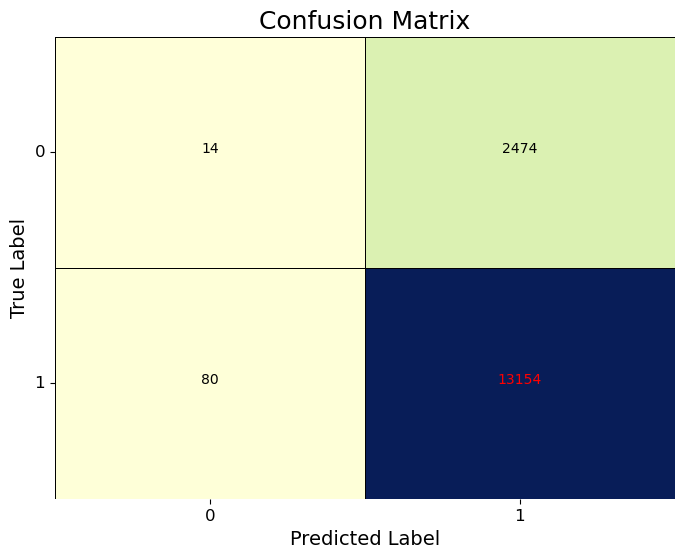

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cv_df, annot=False, fmt="d", cmap="YlGnBu", linewidths=0.5, linecolor='black',
            cbar=False, annot_kws={"color": "red", "size": 14, "weight": "bold"})

plt.title("Confusion Matrix", fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

# I found a bug that the numbers are not showing in the heatmap. I will fix it by adding the numbers to the heatmap
for i in range(cm_cv_df.shape[0]):
    for j in range(cm_cv_df.shape[1]):
        plt.text(j + 0.5, i + 0.5, cm_cv_df.iloc[i, j],
                 horizontalalignment='center',
                 color='red' if cm_cv_df.iloc[i, j] > cm_cv_df.max().max() / 2 else 'black')

plt.show()